In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [185]:
#loading the dataset
df=pd.read_csv("C:\\Users\\ssnan\\Downloads\\ottdata.csv")

In [187]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [189]:
df.shape

(1000, 8)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [193]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


In [195]:
df.visitors.unique()

array([1.67, 1.46, 1.47, 1.85, 1.61, 1.8 , 1.58, 1.7 , 1.78, 1.69, 1.62,
       2.02, 1.55, 1.5 , 1.59, 1.79, 1.33, 1.41, 1.68, 1.44, 1.63, 1.25,
       2.03, 1.76, 1.81, 1.49, 1.72, 1.74, 1.35, 2.34, 1.82, 2.14, 1.73,
       1.92, 1.54, 1.98, 1.9 , 1.57, 1.75, 1.77, 1.93, 1.53, 1.39, 1.48,
       1.36, 1.95, 2.06, 1.27, 2.19, 1.84, 1.83, 2.16, 1.34, 1.26, 1.6 ,
       1.64])

In [197]:
df.ad_impressions.unique()

array([1113.81, 1498.41, 1079.19, 1342.77, 1588.38, 1311.96, 1690.43,
       1336.16, 2122.33, 1246.03, 1010.87, 1229.35, 1700.04, 1590.19,
       1420.88, 1686.75, 1714.73, 1614.01, 1383.58, 1972.77, 1830.39,
       1210.33, 1172.7 , 1361.12, 1710.1 , 1031.85, 1161.18, 1284.86,
       1623.67, 1145.37, 1231.3 , 1388.28, 1701.97, 1216.54, 1189.26,
       1439.04, 1557.2 , 1477.62, 1698.35, 1294.78, 1629.94, 1741.52,
       1639.83, 1152.29, 1654.93, 1390.62, 1323.74, 1525.32, 1081.23,
       1992.53, 1928.85, 1403.8 , 1067.64, 1119.9 , 1146.51, 1248.27,
       1329.48, 1357.74, 1359.8 , 1391.57, 1140.23, 2424.2 , 1199.38,
       1663.8 , 1346.22, 2158.03, 1321.7 , 1200.65, 1402.24, 1398.05,
       1083.48, 1469.85, 1060.86, 1189.32, 1262.25, 2162.24, 1190.25,
       1554.74, 1890.97, 1407.43])

In [199]:
df.major_sports_event.unique()

array([0, 1], dtype=int64)

In [201]:
df.views_trailer.unique()

array([ 56.7 ,  52.69,  48.74,  49.81,  55.83,  49.72,  48.15,  56.11,
        51.91,  48.22,  52.55,  52.52,  52.45, 190.02,  59.46,  52.24,
       195.31,  54.71, 161.56,  55.16,  54.4 ,  52.63, 192.32,  50.79,
        56.64,  56.27,  56.52, 124.43, 129.2 ,  54.49,  51.83,  55.13,
       100.65,  54.  ,  45.42,  52.16,  49.63,  54.07, 100.46,  54.56,
        56.78, 122.94, 130.95,  59.05,  54.67,  49.9 ,  91.49,  48.91,
        60.37,  51.9 ,  50.94, 106.3 ,  52.83,  57.18,  53.04,  57.73,
        50.82,  53.87, 193.46,  48.48, 181.11,  51.1 ,  50.99,  52.26,
        47.11,  55.69, 191.37,  46.1 ,  72.08,  57.48, 125.22,  54.98,
        52.03,  48.8 ,  49.23,  53.96,  51.53, 172.77,  52.53,  53.79,
        30.34,  33.51,  57.29,  53.19,  52.14,  46.39,  50.09, 188.95,
       144.25, 117.66,  49.47,  53.63,  47.81, 185.5 ,  54.11,  54.37,
        52.98,  55.12,  56.45,  51.05,  57.08,  58.97,  55.55, 133.64,
        55.94,  50.6 ,  56.29,  52.31,  61.98,  56.97,  54.06,  51.15,
      

In [203]:
df.duplicated().sum()

0

In [205]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [207]:
df.genre.unique()

array(['Horror', 'Thriller', 'Sci-Fi', 'Others', 'Drama', 'Action',
       'Comedy', 'Romance'], dtype=object)

In [209]:
def histogram_boxplot(df, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

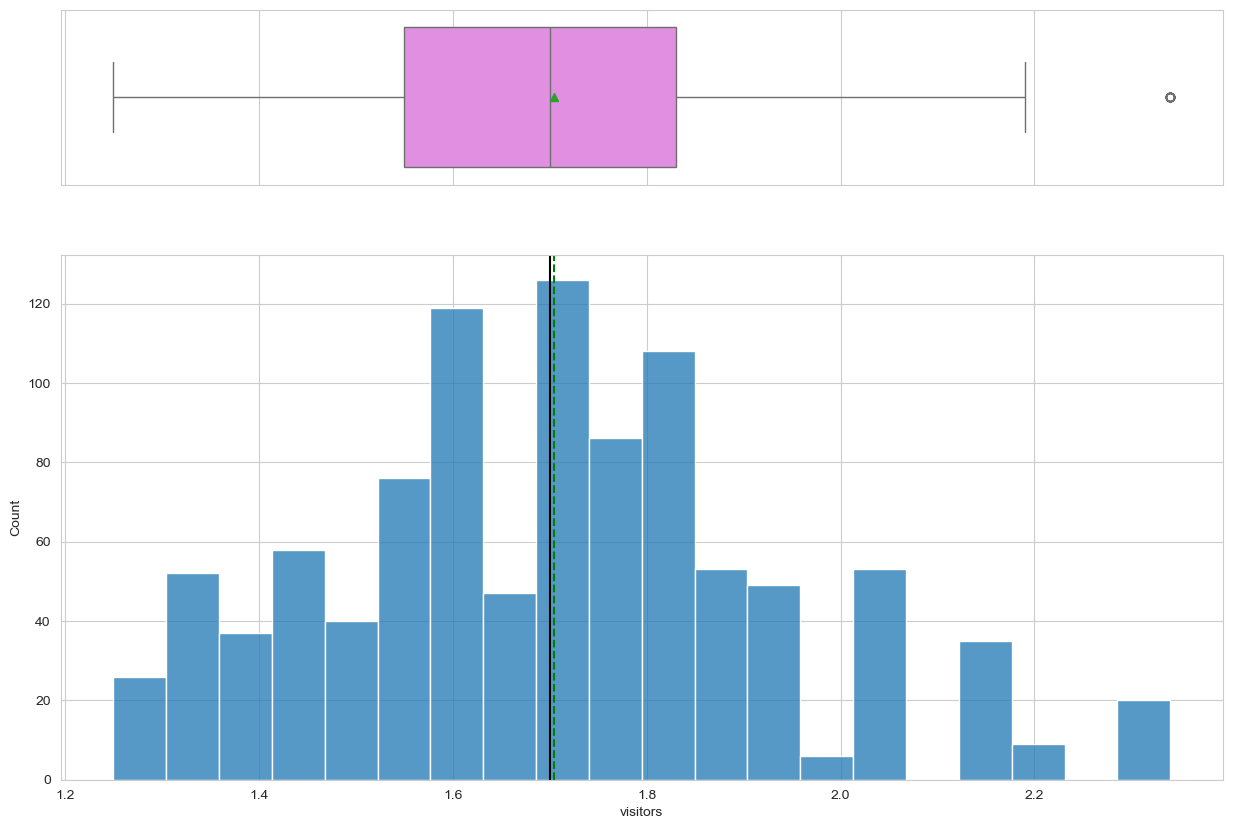

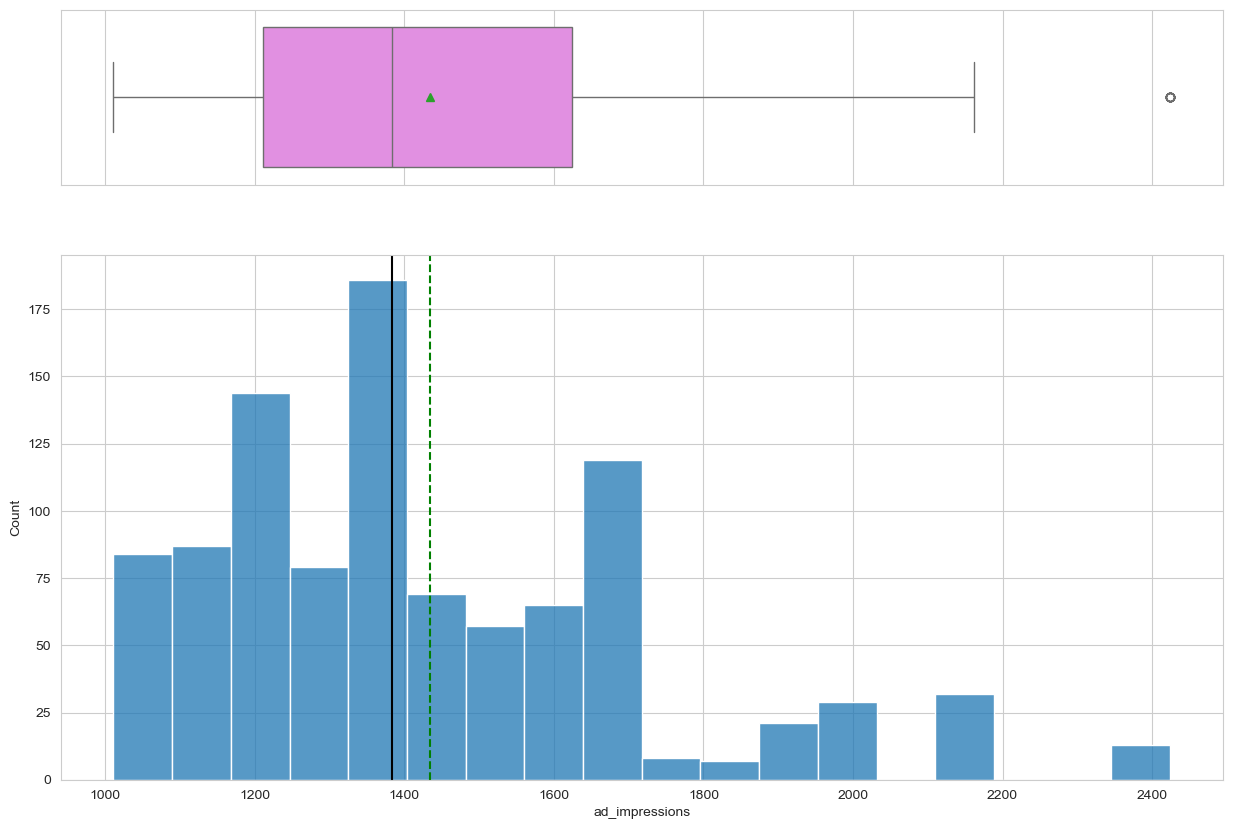

In [211]:
histogram_boxplot(df,"visitors")

histogram_boxplot(df,"ad_impressions")

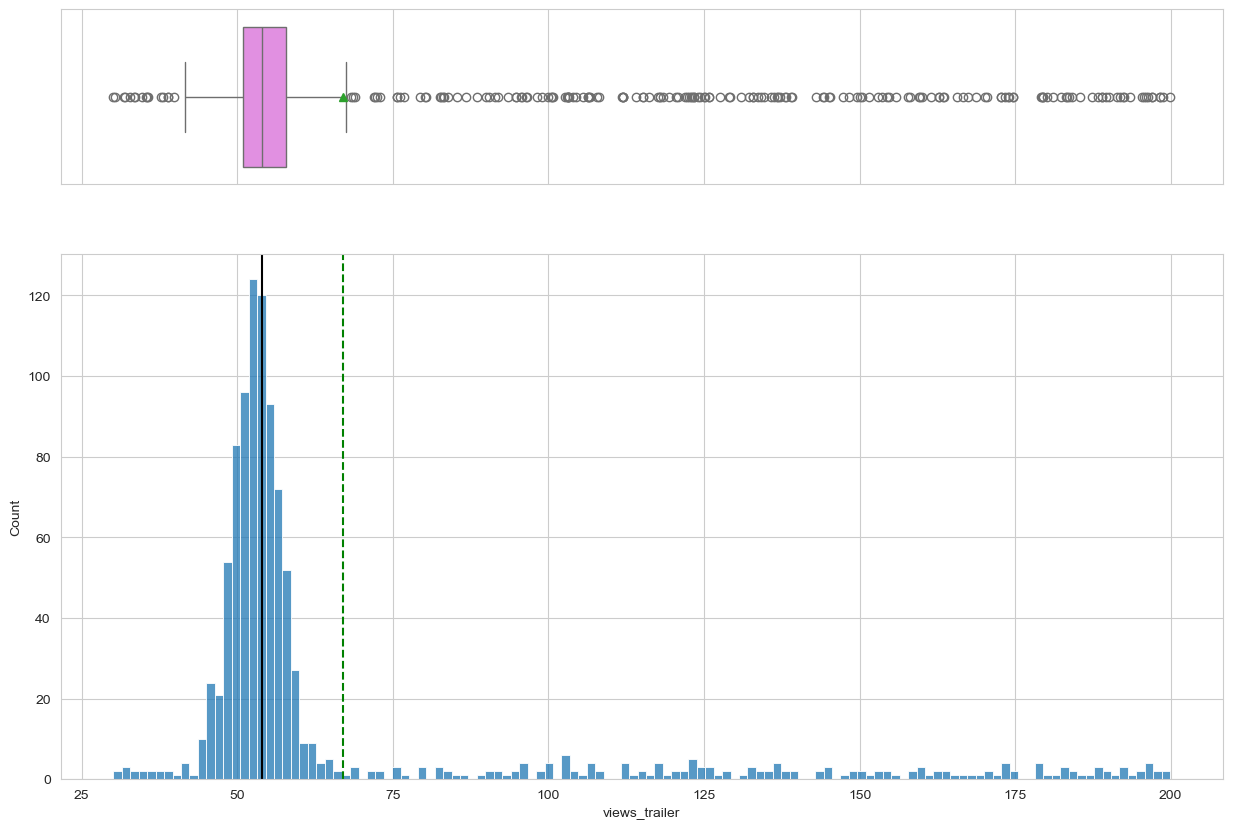

In [212]:
histogram_boxplot(df,"views_trailer")

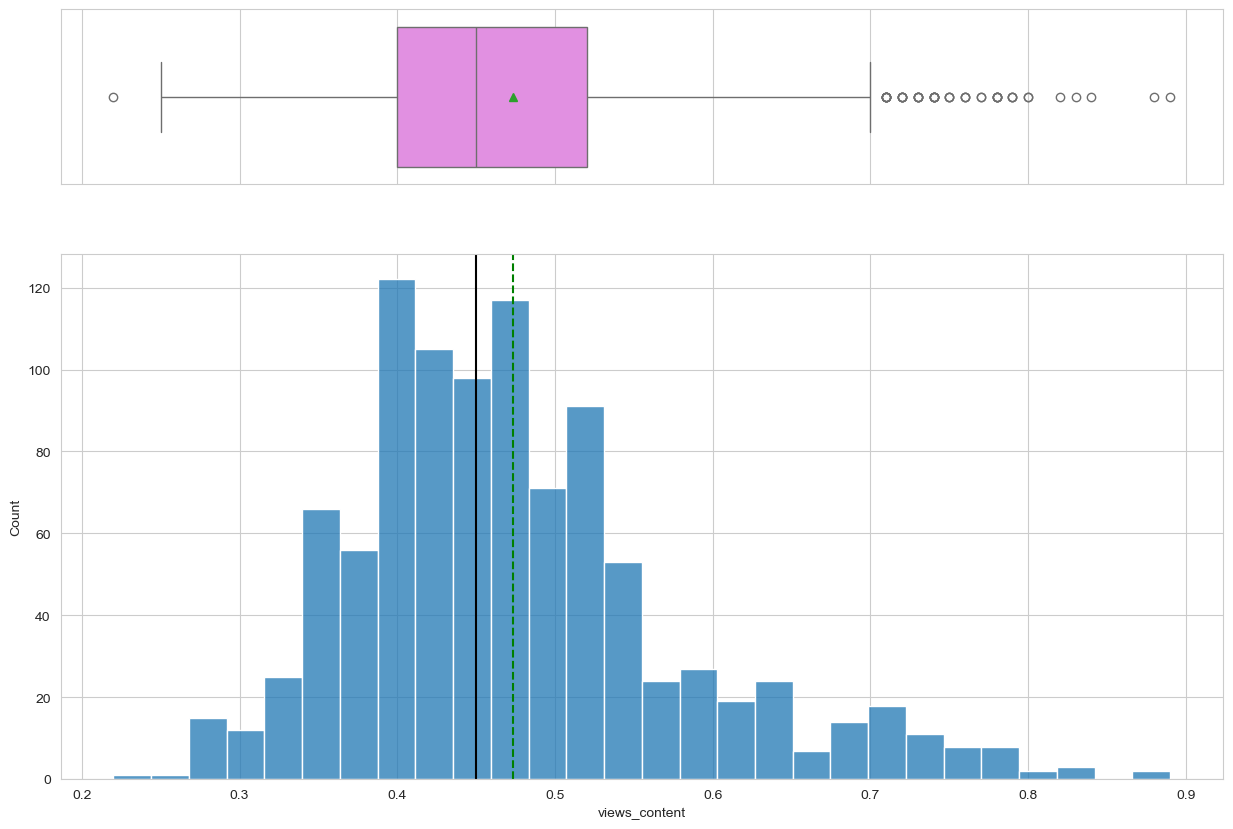

In [213]:
histogram_boxplot(df,"views_content")

In [214]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        hue=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

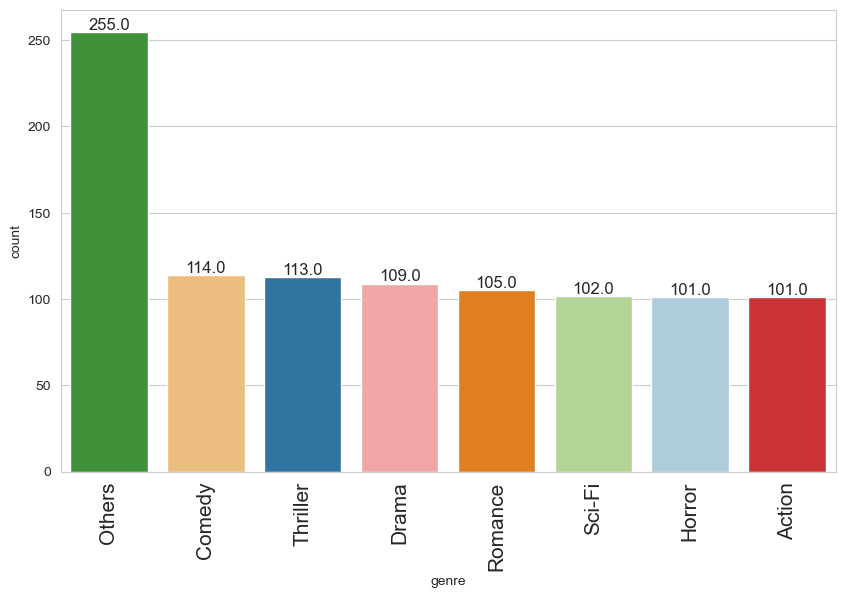

In [215]:
labeled_barplot(df,"genre")

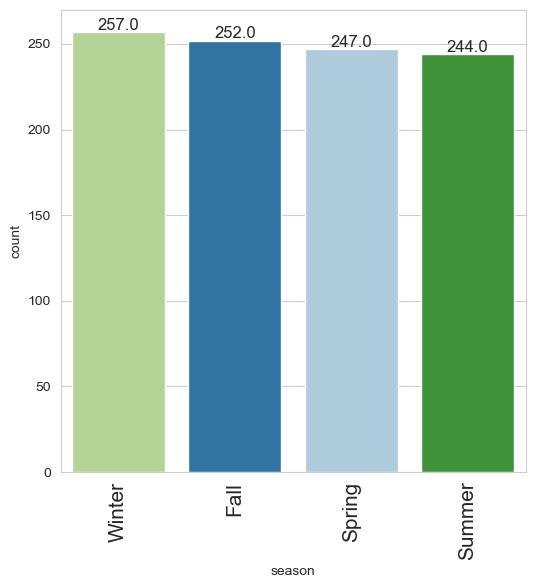

In [217]:
labeled_barplot(df,"season")

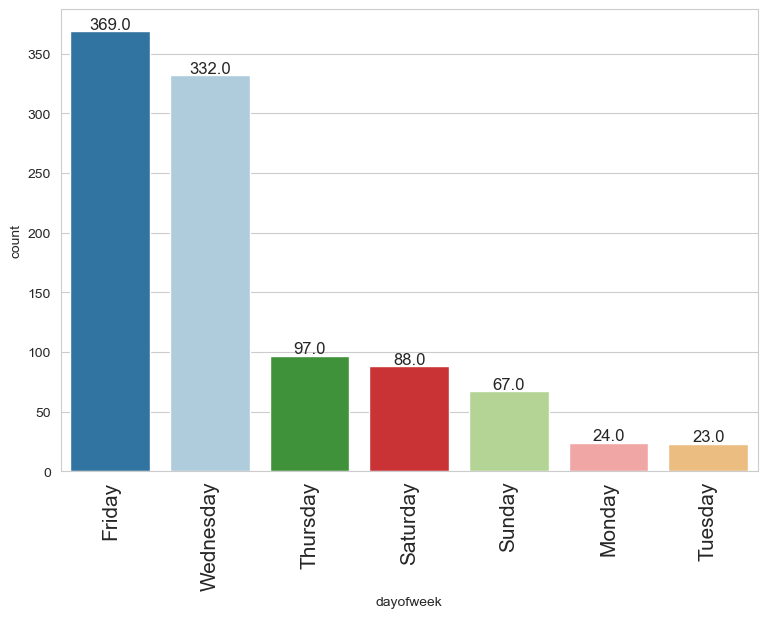

In [218]:
labeled_barplot(df,"dayofweek")

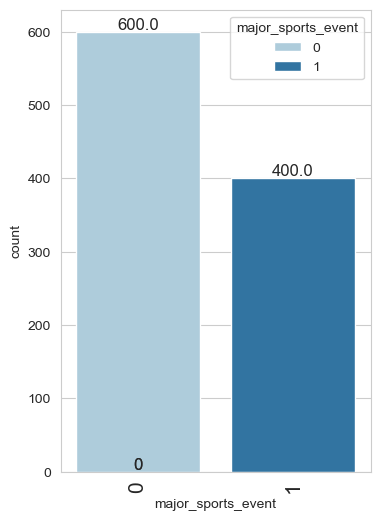

In [219]:
labeled_barplot(df,"major_sports_event")

In [221]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("major_sports_event")

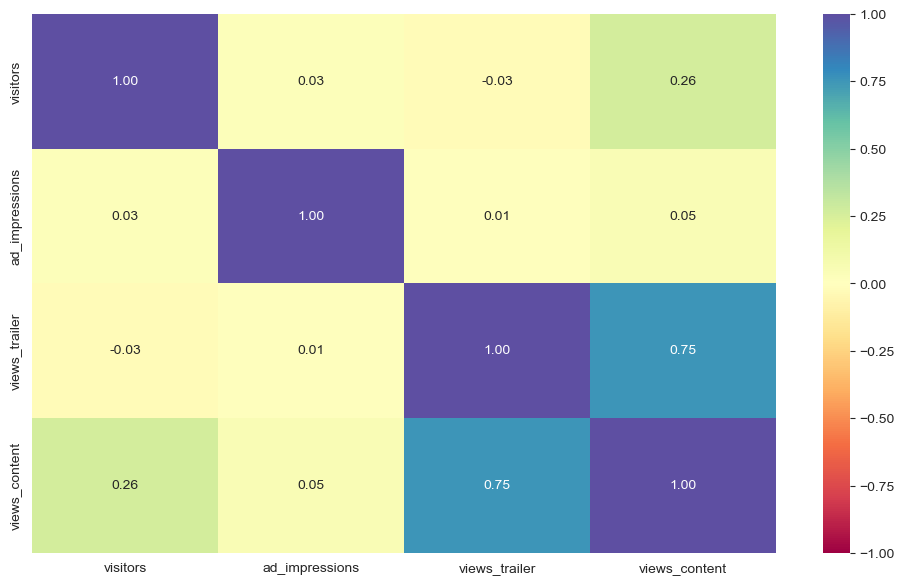

In [222]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

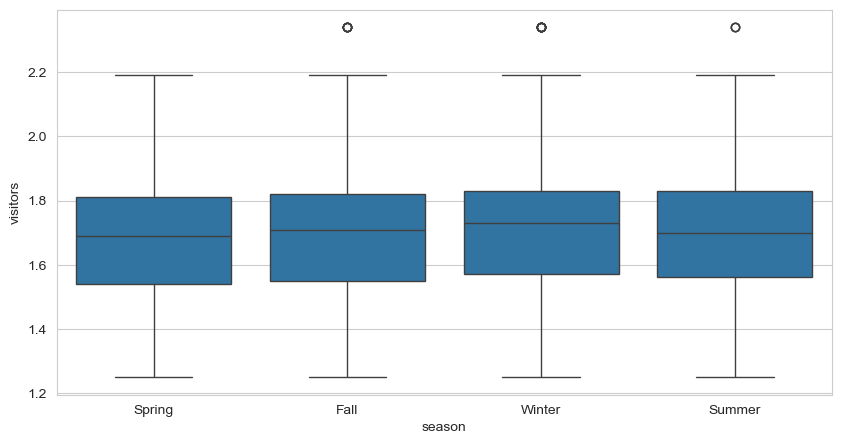

In [223]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="visitors")
plt.show()

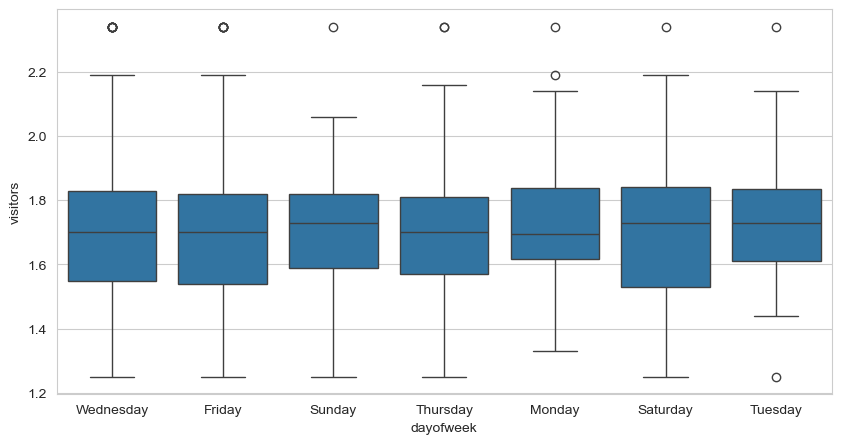

In [226]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="visitors")
plt.show()

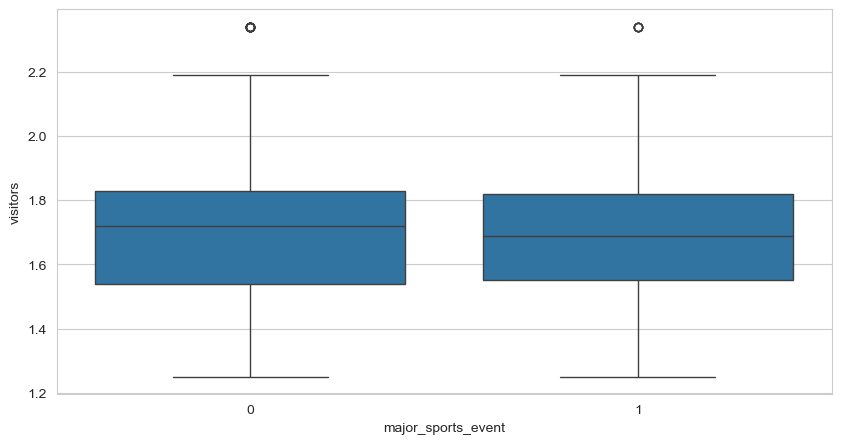

In [228]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="major_sports_event", y="visitors")
plt.show()

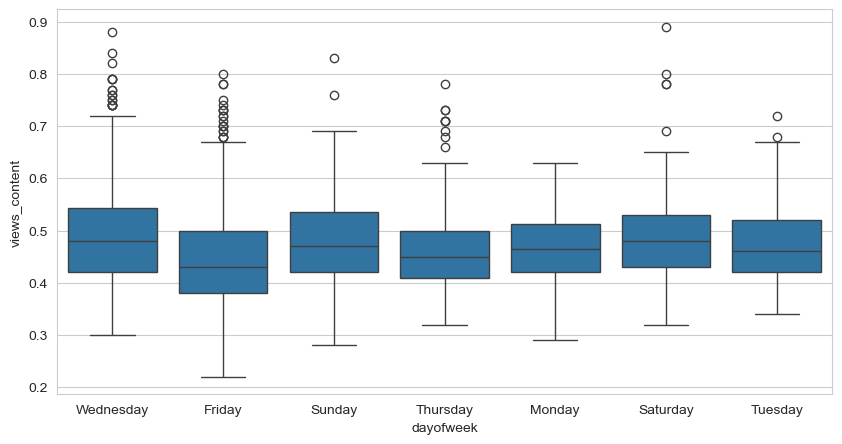

In [230]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="views_content")
plt.show()

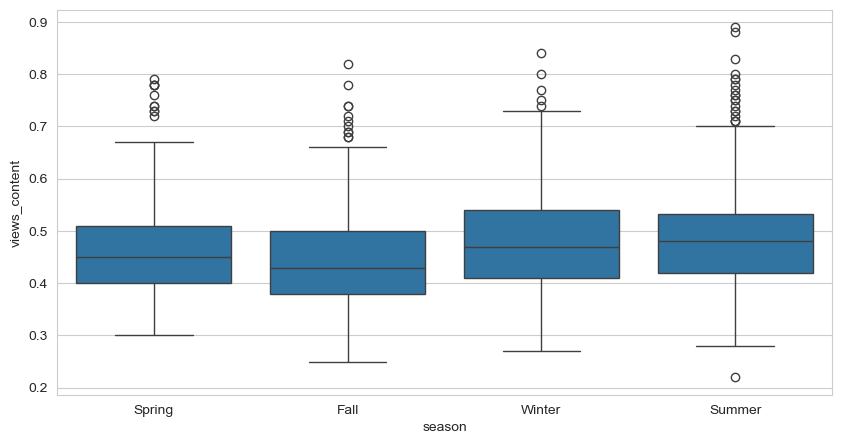

In [231]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="views_content")
plt.show()

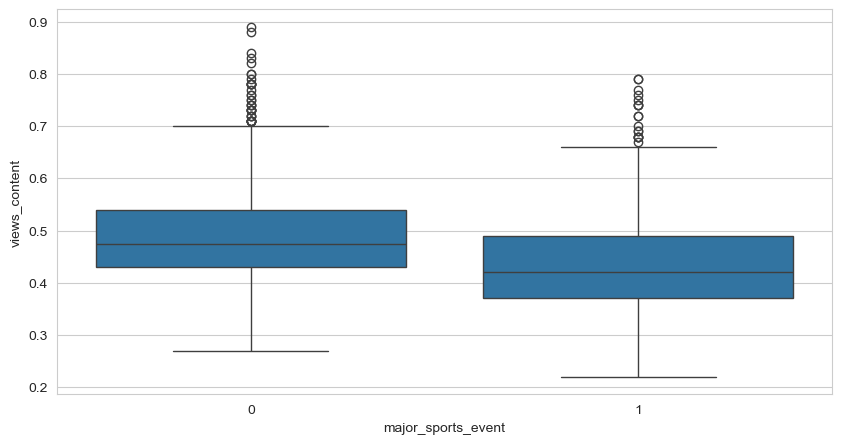

In [233]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="major_sports_event", y="views_content")
plt.show()

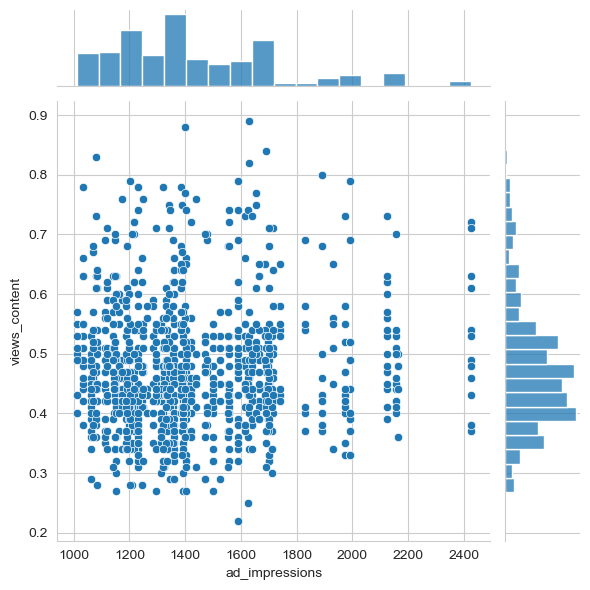

In [236]:
sns.jointplot(data=df, x="ad_impressions", y="views_content")
plt.show()

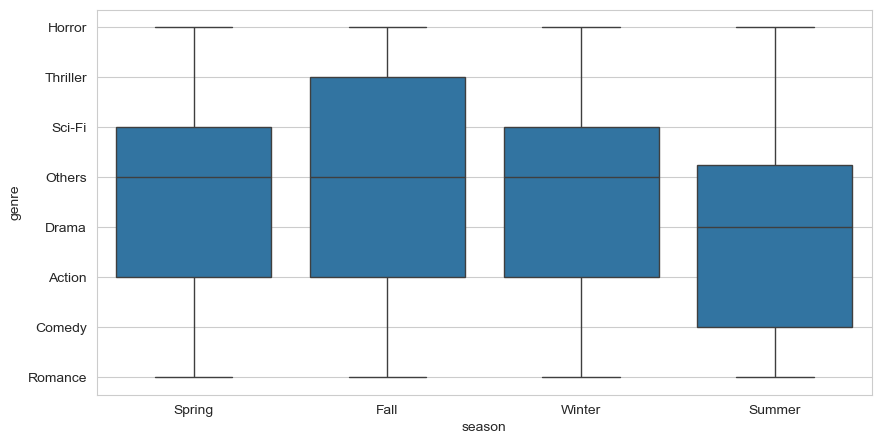

In [237]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="genre")
plt.show()

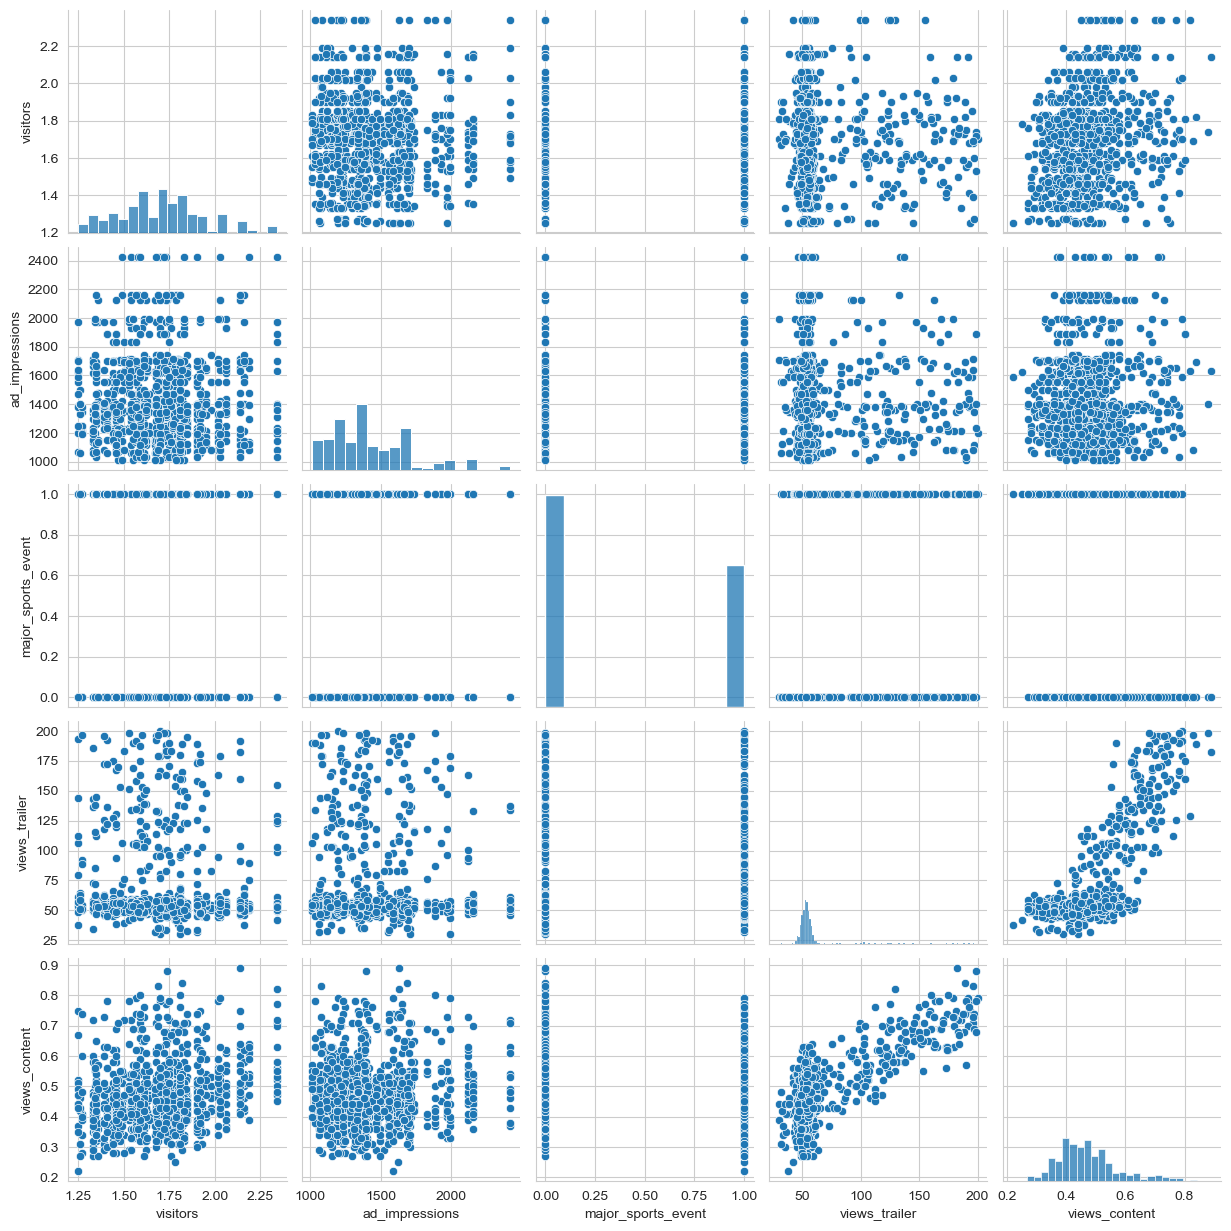

In [239]:
sns.pairplot(data=df);

In [241]:
corr_matrix= df[["views_trailer","views_content"]].corr()

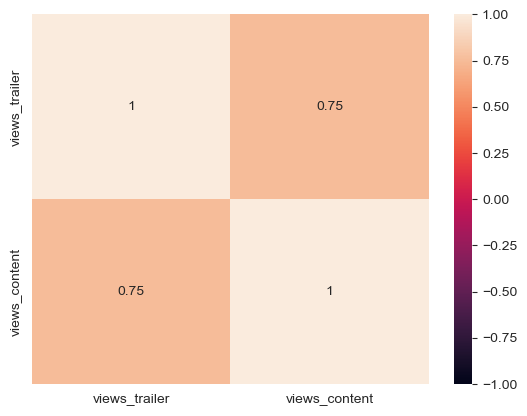

In [243]:
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1);

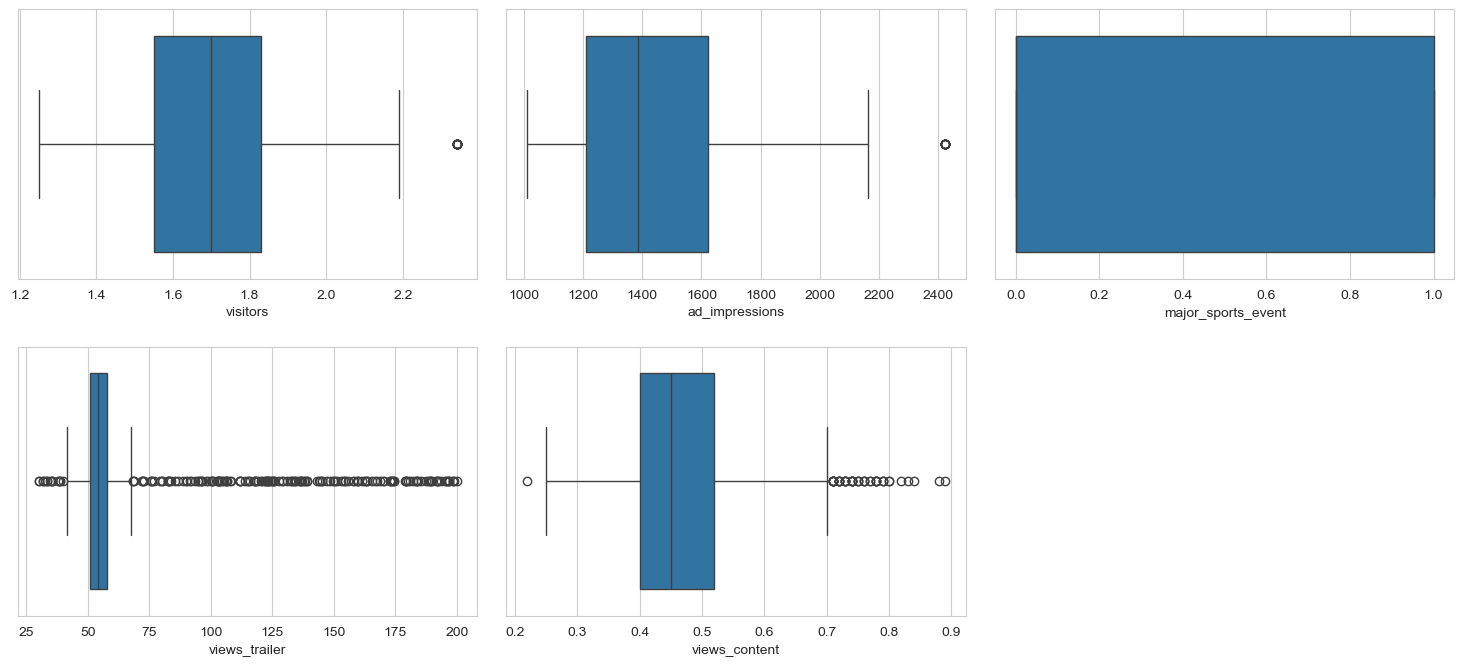

In [245]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)
plt.show()

In [247]:
X = df.drop(["views_content"], axis=1)
y = df["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [249]:
# let's add the intercept to data
X = sm.add_constant(X)

In [251]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [252]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [255]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [256]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


In [257]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.32e-215
Time:                        10:43:48   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

In [258]:


# Displaying coefficients with column names
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': olsmodel.params.values
})
print(coefficients)


                Feature  Coefficient
0                 const     0.060157
1              visitors     0.129451
2        ad_impressions     0.000004
3    major_sports_event    -0.060326
4         views_trailer     0.002330
5          genre_Comedy     0.009352
6           genre_Drama     0.012625
7          genre_Horror     0.009862
8          genre_Others     0.006325
9         genre_Romance     0.000551
10         genre_Sci-Fi     0.013143
11       genre_Thriller     0.008708
12     dayofweek_Monday     0.033662
13   dayofweek_Saturday     0.057887
14     dayofweek_Sunday     0.036321
15   dayofweek_Thursday     0.017289
16    dayofweek_Tuesday     0.022837
17  dayofweek_Wednesday     0.047376
18        season_Spring     0.022602
19        season_Summer     0.044203
20        season_Winter     0.027161


In [259]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [260]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [261]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values:\n\n{}\n".format(vif_series1))

VIF values:

const                  99.679317
visitors                1.027837
ad_impressions          1.029390
major_sports_event      1.065689
views_trailer           1.023551
genre_Comedy            1.917635
genre_Drama             1.926699
genre_Horror            1.904460
genre_Others            2.573779
genre_Romance           1.753525
genre_Sci-Fi            1.863473
genre_Thriller          1.921001
dayofweek_Monday        1.063551
dayofweek_Saturday      1.155744
dayofweek_Sunday        1.150409
dayofweek_Thursday      1.169870
dayofweek_Tuesday       1.062793
dayofweek_Wednesday     1.315231
season_Spring           1.541591
season_Summer           1.568240
season_Winter           1.570338
dtype: float64



In [263]:
x_train2 = x_train.drop(["genre_Others"],axis=1)
olsmod_1 = sm.OLS(y_train,x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3)
)

R-squared 0.791 
Adjusted R-squared: 0.786


In [264]:
x_train = x_train.drop(["genre_Others"],axis=1)

In [265]:
olsmod_2 =sm.OLS(y_train,x_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.66e-216
Time:                        10:43:49   Log-Likelihood:                 1124.2
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     680   BIC:                            -2117.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0660    

In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series2 = pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values:\n\n{}\n".format(vif_series2))

VIF values:

const                  87.570676
visitors                1.022226
ad_impressions          1.028804
major_sports_event      1.065264
views_trailer           1.020524
genre_Comedy            1.204848
genre_Drama             1.223443
genre_Horror            1.204654
genre_Romance           1.171988
genre_Sci-Fi            1.205594
genre_Thriller          1.206560
dayofweek_Monday        1.063551
dayofweek_Saturday      1.154886
dayofweek_Sunday        1.150034
dayofweek_Thursday      1.169852
dayofweek_Tuesday       1.058831
dayofweek_Wednesday     1.314380
season_Spring           1.541573
season_Summer           1.545311
season_Winter           1.568494
dtype: float64



In [267]:
x_train = x_train.drop(["ad_impressions"],axis=1)

In [268]:
olsmod_3 =sm.OLS(y_train,x_train)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     143.4
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.57e-217
Time:                        10:43:49   Log-Likelihood:                 1124.1
No. Observations:                 700   AIC:                            -2210.
Df Residuals:                     681   BIC:                            -2124.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0707    

In [269]:
x_train = x_train.drop(["genre_Romance"],axis=1)

In [270]:
olsmod_4 =sm.OLS(y_train,x_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     152.0
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.46e-218
Time:                        10:43:49   Log-Likelihood:                 1123.9
No. Observations:                 700   AIC:                            -2212.
Df Residuals:                     682   BIC:                            -2130.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0699    

In [271]:
x_train = x_train.drop(["genre_Thriller"],axis=1)

In [272]:
olsmod_5 =sm.OLS(y_train,x_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.58e-219
Time:                        10:43:49   Log-Likelihood:                 1123.6
No. Observations:                 700   AIC:                            -2213.
Df Residuals:                     683   BIC:                            -2136.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0712    

In [273]:
x_train = x_train.drop(["genre_Comedy"],axis=1)

In [274]:
olsmod_6 =sm.OLS(y_train,x_train)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.62e-220
Time:                        10:43:49   Log-Likelihood:                 1123.3
No. Observations:                 700   AIC:                            -2215.
Df Residuals:                     684   BIC:                            -2142.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0723    

In [275]:
x_train = x_train.drop(["genre_Horror"],axis=1)

In [276]:
olsmod_7 =sm.OLS(y_train,x_train)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     184.8
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.50e-221
Time:                        10:43:49   Log-Likelihood:                 1123.0
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     685   BIC:                            -2148.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0731    

In [277]:
x_train = x_train.drop(["genre_Drama"],axis=1)

In [278]:
olsmod_8 =sm.OLS(y_train,x_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     198.8
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.93e-222
Time:                        10:43:49   Log-Likelihood:                 1122.4
No. Observations:                 700   AIC:                            -2217.
Df Residuals:                     686   BIC:                            -2153.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0739    

In [279]:
x_train = x_train.drop(["genre_Sci-Fi"],axis=1)

In [280]:
olsmod_9 =sm.OLS(y_train,x_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     215.2
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          2.28e-223
Time:                        10:43:49   Log-Likelihood:                 1121.8
No. Observations:                 700   AIC:                            -2218.
Df Residuals:                     687   BIC:                            -2158.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0746    

In [281]:
x_train = x_train.drop(["dayofweek_Tuesday"],axis=1)

In [282]:
olsmod_10 =sm.OLS(y_train,x_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          7.03e-224
Time:                        10:43:49   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [283]:
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsres_10.fittedvalues.values
df_pred["Residuals"] = olsres_10.resid.values
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.40,0.445434,-0.045434
1,0.70,0.677403,0.022597
2,0.42,0.433999,-0.013999
3,0.55,0.562030,-0.012030
4,0.59,0.547786,0.042214


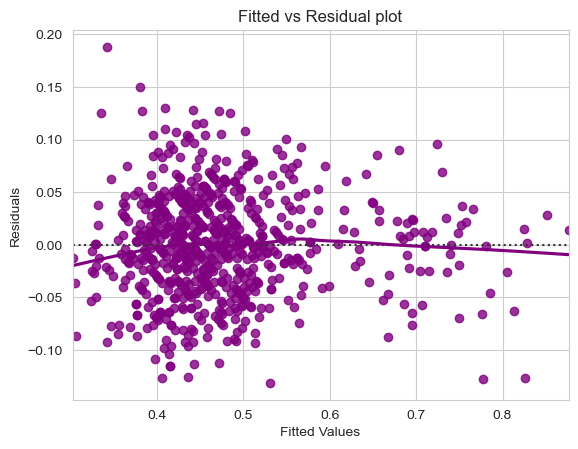

In [284]:
#test for linearity
sns.set_style("whitegrid")
sns.residplot(data=df_pred,x="Fitted Values",y="Residuals",color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

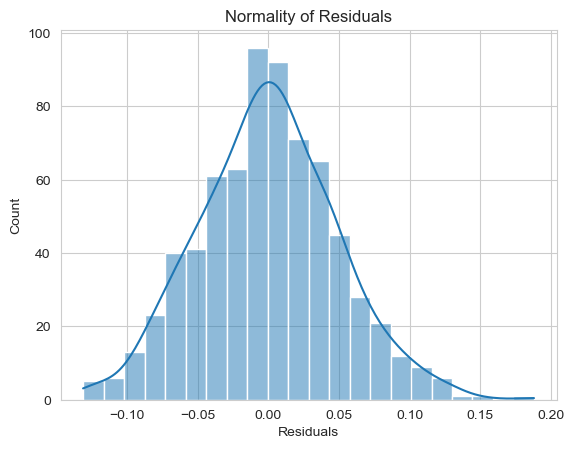

In [285]:
sns.histplot(df_pred["Residuals"],kde=True)
plt.title("Normality of Residuals")
plt.show()

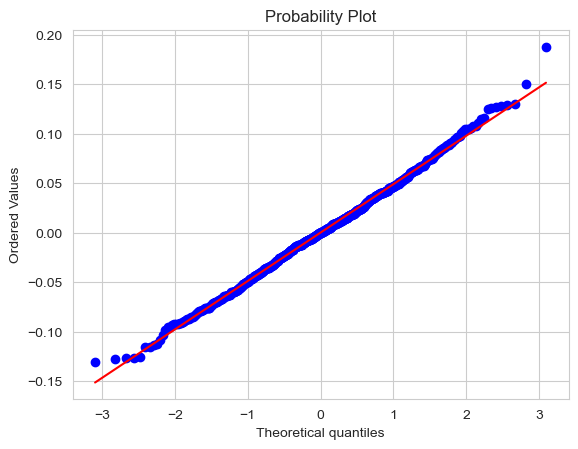

In [286]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show()

In [287]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973155427169238, pvalue=0.31085896470057883)

In [290]:
#since the p value is greater than 0.05 hence it follows a normal distribution

In [292]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [293]:
name=["F statistic","p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"],x_train)
lzip(name,test)

[('F statistic', 1.131361290420075), ('p-value', 0.12853551819087372)]

In [294]:
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          7.03e-224
Time:                        10:43:51   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [295]:
Equation = "views_content ="
print(Equation, end=" ")
for i in range(len(x_train.columns)):
    if i == 0:
        print(olsres_10.params[i], "+", end=" ")
    elif i != len(x_train.columns) - 1:
        print(
            olsres_10.params[i],
            "* (",
            x_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_10.params[i], "* (", x_train.columns[i], ")")

views_content = 0.07467052053721349 + 0.129095818258941 * ( visitors ) +  -0.060555078181373276 * ( major_sports_event ) +  0.0023308167861640127 * ( views_trailer ) +  0.032065806790236344 * ( dayofweek_Monday ) +  0.0570285966016511 * ( dayofweek_Saturday ) +  0.03438622992362495 * ( dayofweek_Sunday ) +  0.015449441769973173 * ( dayofweek_Thursday ) +  0.046494803669848164 * ( dayofweek_Wednesday ) +  0.02260491581811801 * ( season_Spring ) +  0.04339100263609974 * ( season_Summer ) +  0.02823055718397679 * ( season_Winter )


C:\Users\ssnan\AppData\Local\Temp\ipykernel_23796\1836029294.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsres_10.params[i], "+", end=" ")
C:\Users\ssnan\AppData\Local\Temp\ipykernel_23796\1836029294.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  olsres_10.params[i],
C:\Users\ssnan\AppData\Local\Temp\ipykernel_23796\1836029294.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsres_10.params[i], "* (", 

In [339]:
x_train.columns

Index(['const', 'visitors', 'major_sports_event', 'views_trailer',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

In [341]:
x_test.columns

Index(['const', 'visitors', 'ad_impressions', 'major_sports_event',
       'views_trailer', 'genre_Comedy', 'genre_Drama', 'genre_Horror',
       'genre_Others', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [343]:
x_test2=x_test.drop(["ad_impressions","genre_Comedy","genre_Drama","genre_Horror","genre_Others","genre_Romance","genre_Sci-Fi","genre_Thriller","dayofweek_Tuesday"],axis=1)

In [345]:
x_test2.columns

Index(['const', 'visitors', 'major_sports_event', 'views_trailer',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

In [347]:
olsmodel = sm.OLS(y_test, x_test2).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     88.76
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.03e-85
Time:                        10:43:59   Log-Likelihood:                 473.19
No. Observations:                 300   AIC:                            -922.4
Df Residuals:                     288   BIC:                            -877.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1077    

In [349]:
y_pred_test = olsres_10.predict(x_test2)
y_pred_train = olsres_10.predict(x_train)

In [361]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for train data is",rmse1)

RMSE for train data is 0.0488411911255676


In [363]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for test data is",rmse2)

RMSE for test data is 0.05110882977473586


In [355]:
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

In [365]:
print("MAPE for train data is",mape_train)

MAPE for train data is 8.595246363691414


In [359]:
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

In [369]:
print("MAPE for test data is",mape_test)

MAPE for test data is 9.177097098945389
